In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from pydataset import data

from env import get_db_url
import mall_wrangle

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
train, validate, test = mall_wrangle.split_data(iris)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


- A. Choose features other than the ones used in the lesson.
- B. Visualize the results of your clustering.
- C. Use the elbow method to visually select a good value for k.
- D. Repeat the clustering, this time with 3 different features.

In [5]:
X = train[['petal_width', 'sepal_width']]

In [6]:
X.head()

,petal_width,sepal_width
56,1.6,3.3
40,0.3,3.5
70,1.8,3.2
23,0.5,3.3
139,2.1,3.1


In [7]:
train.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Modeling

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1], dtype=int32)

In [9]:
train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

Text(0.5, 1.0, 'No clusters')

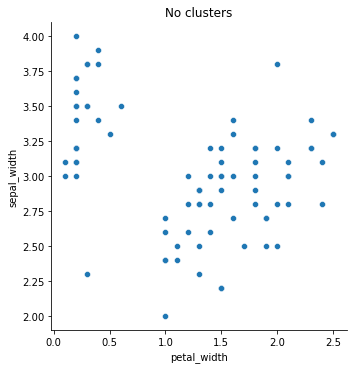

In [10]:
sns.relplot(data = train, x='petal_width', y='sepal_width')
plt.title("No clusters")

Text(0.5, 1.0, 'With 3 clusters')

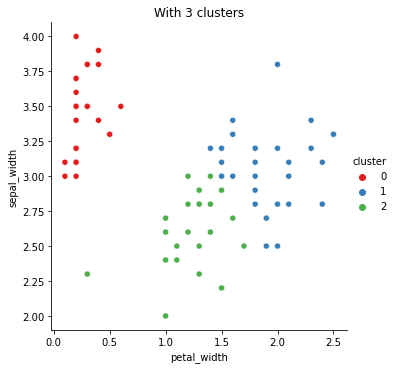

In [11]:
sns.relplot(data = train, x='petal_width', y='sepal_width', hue = 'cluster', palette='Set1')
plt.title("With 3 clusters")

Text(0.5, 1.0, 'With 3 clusters')

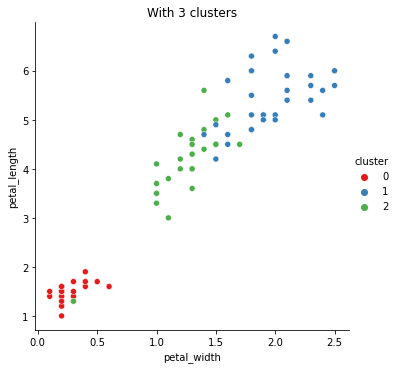

In [12]:
sns.relplot(data = train, x='petal_width', y='petal_length', hue = 'cluster', palette='Set1')
plt.title("With 3 clusters")

Text(0.5, 1.0, 'Actual species')

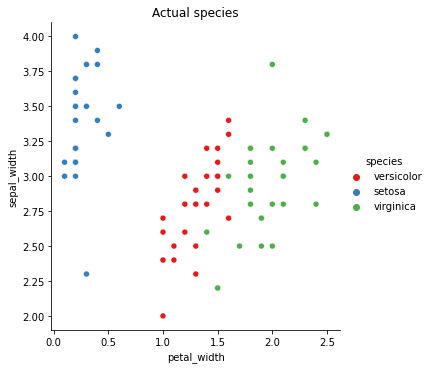

In [13]:
sns.relplot(data = train, x='petal_width', y='sepal_width', hue = 'species', palette='Set1')
plt.title("Actual species")

In [14]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,0.260000,3.440000
1,1.931250,3.056250
2,1.240741,2.614815


In [15]:
train.groupby('cluster')['petal_width', 'sepal_width'].mean()

,petal_width,sepal_width
cluster,,
0,0.260000,3.440000
1,1.931250,3.056250
2,1.240741,2.614815


Text(0.5, 1.0, 'Visualizing Cluster Centers')

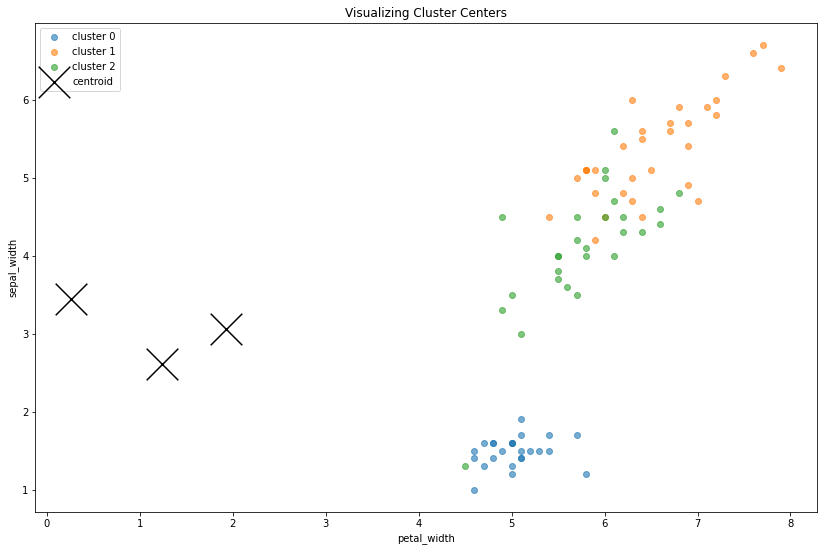

In [16]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_width', x='petal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')

Text(0.5, 1.0, '2 cluster')

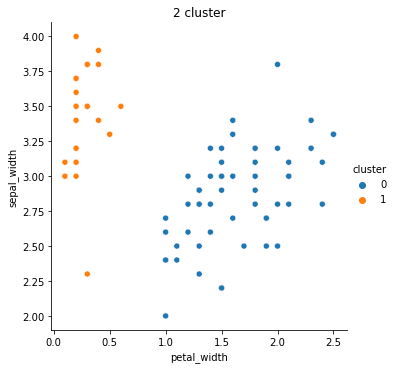

In [17]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='petal_width', y='sepal_width', hue='cluster')
plt.title("2 cluster")

Text(0.5, 1.0, '5 clusters')

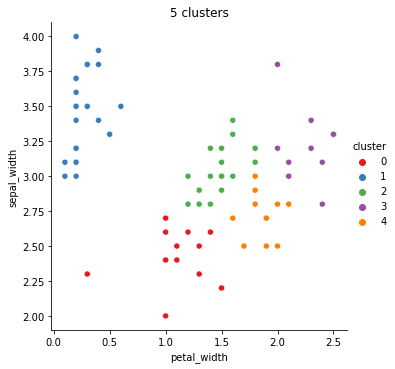

In [18]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='petal_width', y='sepal_width', hue='cluster', palette='Set1')
plt.title("5 clusters")

#### Visualize Clustering/ Use elbow method to select good value for K

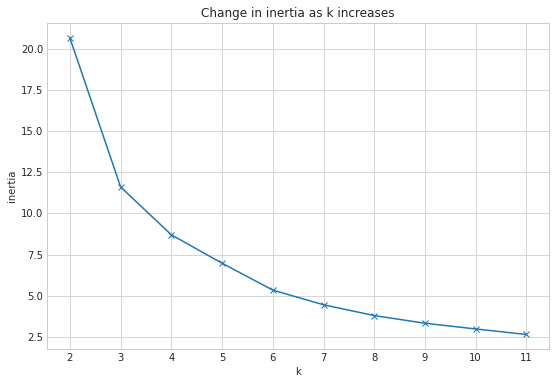

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

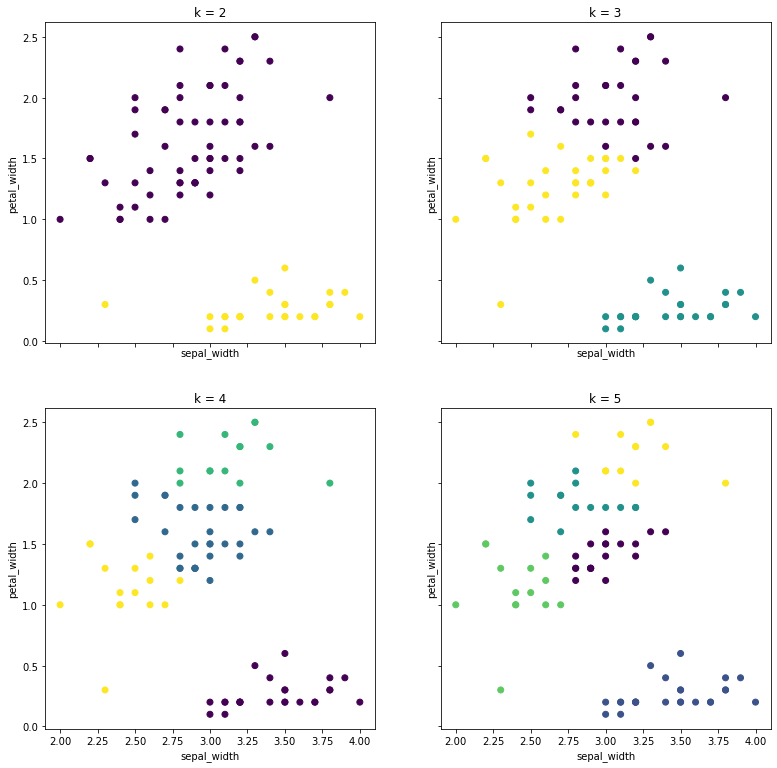

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_width', ylabel='petal_width')

#### Repeat Clustering with 3 features

In [21]:
X = train[['petal_length','petal_width','sepal_length']]

In [22]:
kmean = KMeans(n_clusters=4, random_state=123)
kmean.fit(X)

KMeans(n_clusters=4, random_state=123)

In [23]:
train['cluster'] = kmean.predict(X)

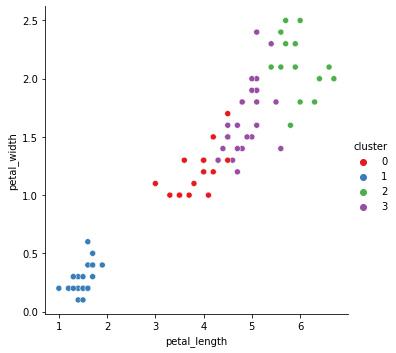

In [24]:
sns.relplot(data = train, x='petal_length', y = 'petal_width', hue = 'cluster', palette='Set1')

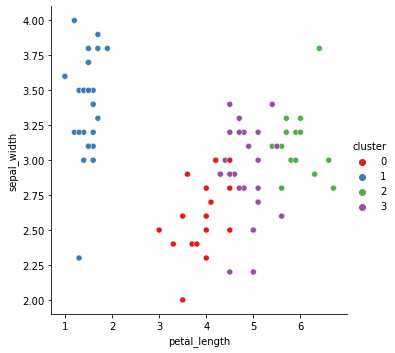

In [25]:
sns.relplot(data = train, x='petal_length', y = 'sepal_width', hue = 'cluster', palette='Set1')

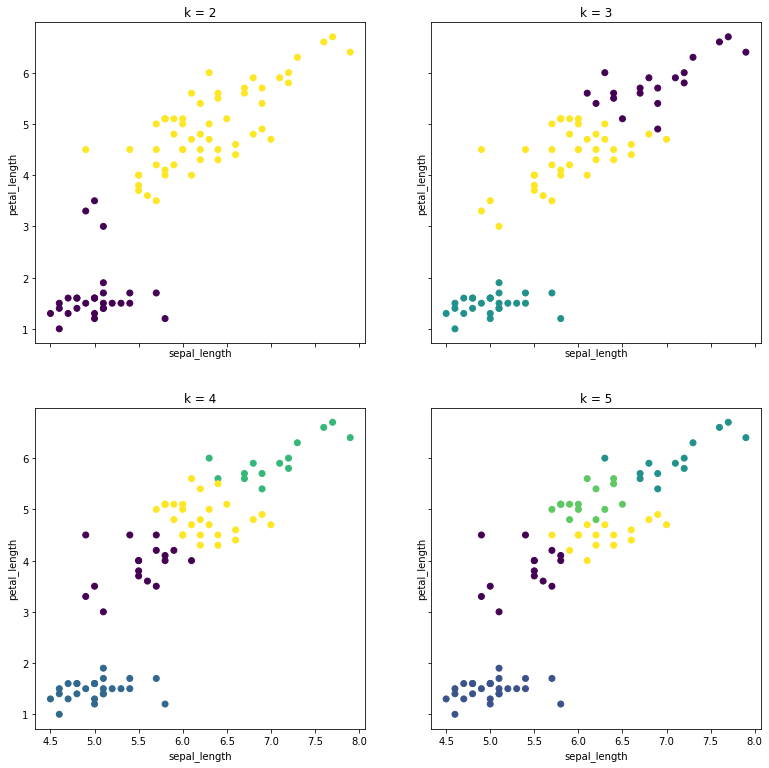

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k, random_state=123).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_length', ylabel='petal_length')

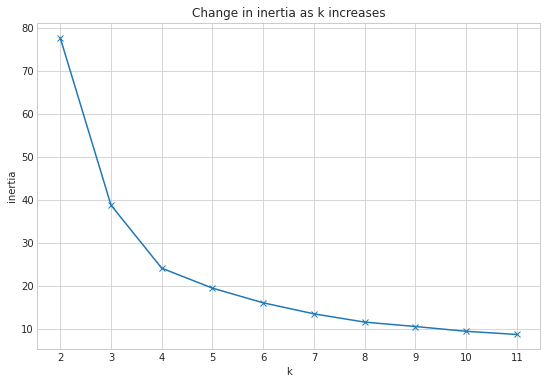

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Take away
- Elbow bend at 4

#### Second take on code

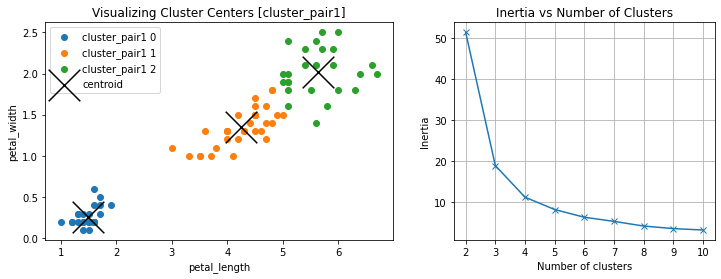

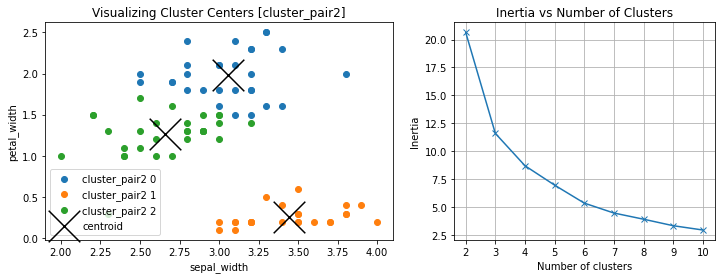

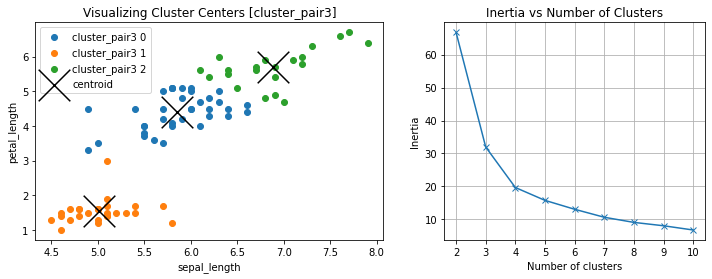

In [28]:
#different features I want to use for each kmeans model
pairs = [['petal_length','petal_width'],['sepal_width','petal_width'],['sepal_length','petal_length']]

for cnt, p in enumerate(pairs):
    #create X subset
    X = train[p]
    #create and fit model
    model = KMeans(n_clusters=3).fit(X)
    
    #cluster name
    cl_name = 'cluster_pair' + str(cnt+1)
    #get clusters
    train[cl_name] = model.predict(X)
    
    #get centroids
    centroids = pd.DataFrame(model.cluster_centers_, columns=X.columns)
    #PLOTTING    
#     plt.figure(figsize=(14,8))
    f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1.5]}, figsize=(12,4))
    #PLOT THE POINTS AND CENTROIDS FOR 3 CLUSTERS
    plt.subplot(121)
    #Loop over the rows, grouped by cluster - plot each cluster
    for grp, subset in train.groupby(cl_name):
        #x is first in pair, y is second
        plt.scatter(subset[p[0]],subset[p[1]], label=cl_name + ' ' + str(grp))
    #throw on centroids
    centroids.plot.scatter(x=p[0],y=p[1],c='black',marker='x',s=1000,ax=plt.gca(),label='centroid')
    #pretty up the graph
    plt.legend()
    plt.xlabel(p[0])
    plt.ylabel(p[1])
    plt.title(f'Visualizing Cluster Centers [{cl_name}]')
    
    #PLOT THE INTERIA CHANGES
    plt.subplot(122)
    with plt.style.context('seaborn-whitegrid'):
        #generate model, fit, get inertia for multiple values for num_clusters
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 11)}).plot(marker='x')
        plt.xticks(range(2, 11))
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.title('Inertia vs Number of Clusters')


## Bonus

In [29]:
train, validate, test = mall_wrangle.wrangle_mall()

Using cached data
Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [30]:
train

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
123,124,39,69,91,1,0.403846,0.442623,0.957447
76,77,45,54,53,0,0.519231,0.319672,0.553191
171,172,28,87,75,1,0.192308,0.590164,0.787234
10,11,67,19,14,1,0.942308,0.032787,0.138298
35,36,21,33,81,0,0.057692,0.147541,0.851064
39,40,20,37,75,0,0.038462,0.180328,0.787234
98,99,48,61,42,1,0.576923,0.377049,0.436170
57,58,69,44,46,1,0.980769,0.237705,0.478723
103,104,26,62,55,1,0.153846,0.385246,0.574468
44,45,49,39,28,0,0.596154,0.196721,0.287234


In [31]:
X = train[['age_scaled','gender_Male']]

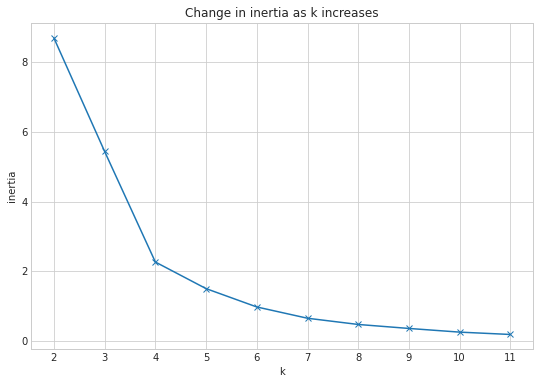

In [32]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### 4 is elbow

In [33]:
kmean = KMeans(n_clusters=4, random_state=123)
kmean.fit(X)

KMeans(n_clusters=4, random_state=123)

In [34]:
train['cluster'] = kmean.predict(X)

In [35]:
# clustering by age and gender
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,102.534884,28.837209,60.209302,60.511628,0.0,0.208408,0.370568,0.633102
1,103.464286,29.357143,62.392857,58.428571,1.0,0.218407,0.388466,0.610942
2,97.346154,52.153846,61.269231,36.730769,0.0,0.656805,0.379256,0.380115
3,85.933333,59.000000,54.600000,42.333333,1.0,0.788462,0.324590,0.439716


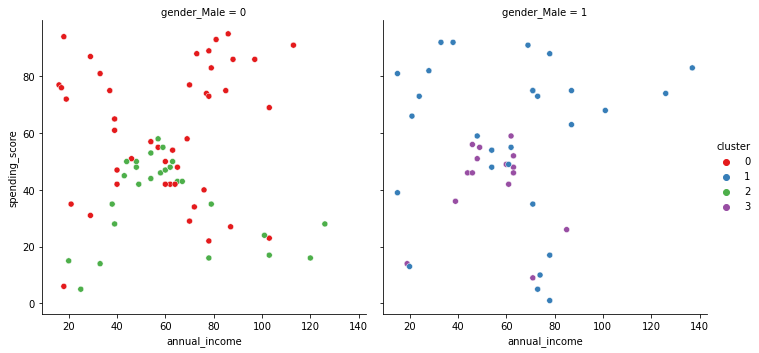

In [36]:
sns.relplot(data = train, x = 'annual_income', y='spending_score', hue='cluster', col='gender_Male', palette='Set1')

### Takeaway: 
- Not seeing anything useful

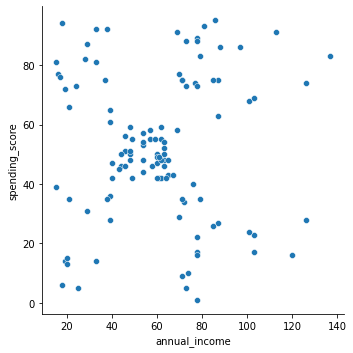

In [37]:
sns.relplot(data = train, x='annual_income', y = 'spending_score')

#### Possible Clustering

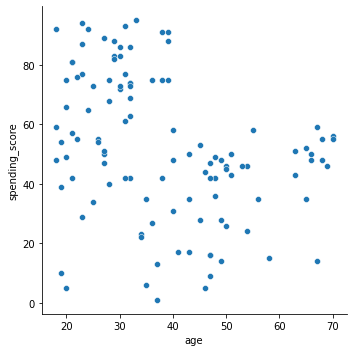

In [38]:
sns.relplot(data = train, x='age', y = 'spending_score')

In [39]:
X = train[['age_scaled', 'annual_income_scaled']]

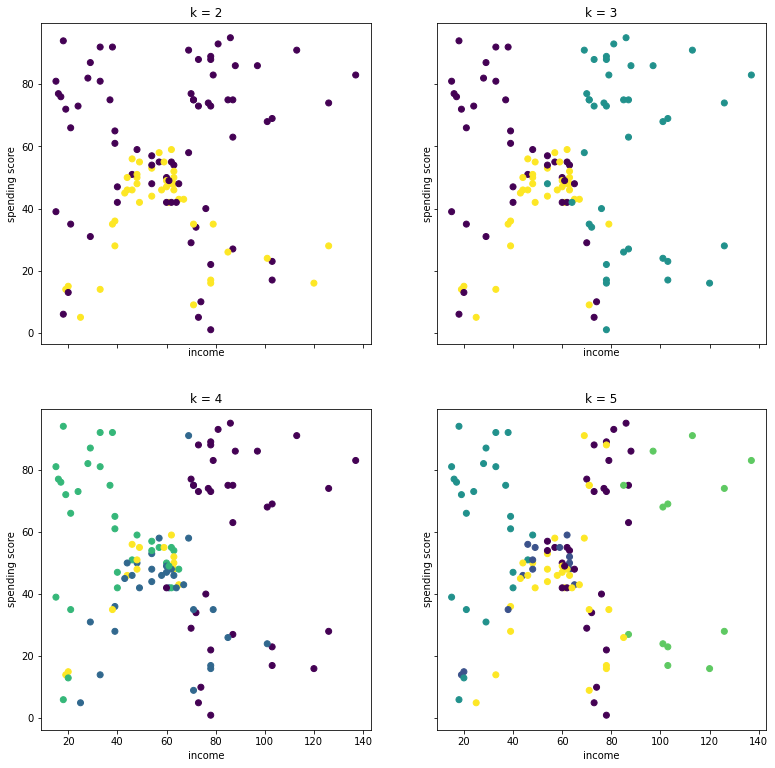

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k, random_state=123).fit(X).predict(X)
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='income', ylabel='spending score')

#### Takeaway
- Surprisingly not good clusters

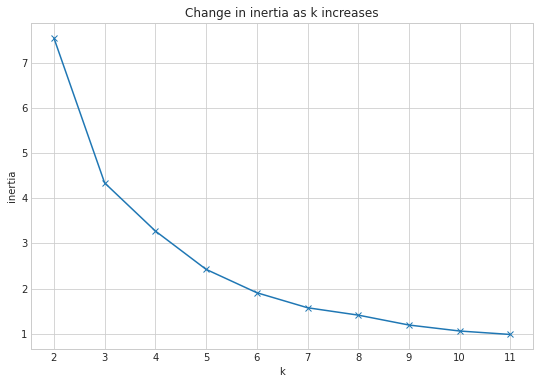

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


#### Takeaway
- Elbow = 3

In [42]:
kmean=KMeans(n_clusters=3, random_state=123)
kmean.fit(X)

train['cluster'] = kmean.predict(X)

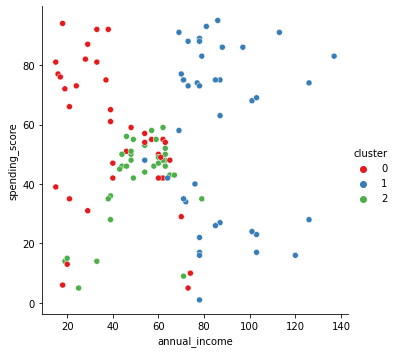

In [43]:
sns.relplot(data = train, x='annual_income', y='spending_score', hue = 'cluster', palette = 'Set1')

#### Age and income doesn't effect data

In [45]:
train.head()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled,cluster
123,124,39,69,91,1,0.403846,0.442623,0.957447,1
76,77,45,54,53,0,0.519231,0.319672,0.553191,2
171,172,28,87,75,1,0.192308,0.590164,0.787234,1
10,11,67,19,14,1,0.942308,0.032787,0.138298,2
35,36,21,33,81,0,0.057692,0.147541,0.851064,0


In [46]:
# Will try clustering on age, income, and spending score
X=train[['age_scaled','annual_income_scaled','spending_score_scaled']]

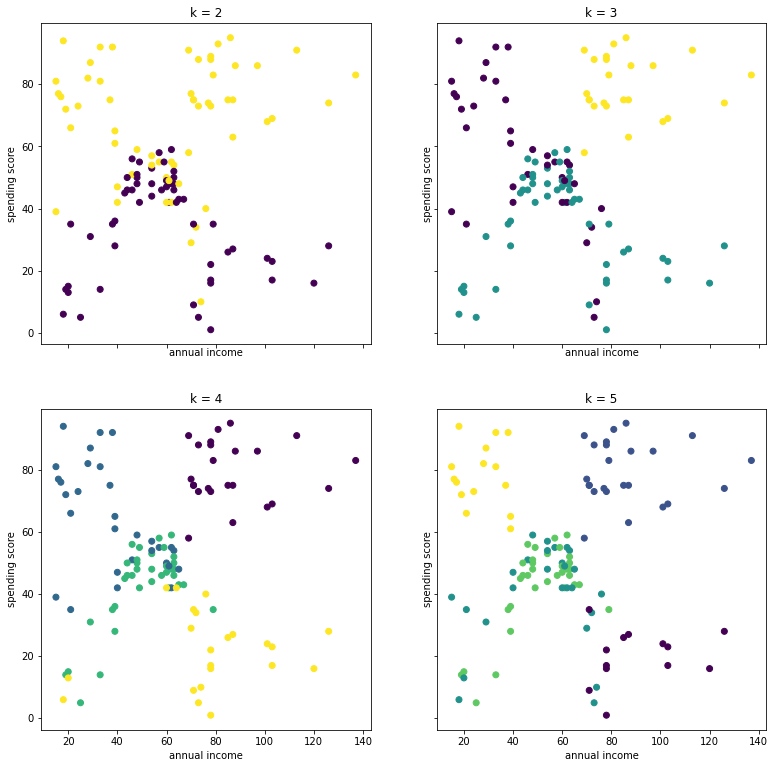

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k, random_state=123).fit(X).predict(X)
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='spending score')


In [48]:
# k=5 had best distinguishable clusters
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)

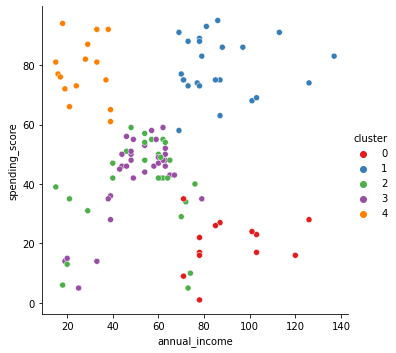

In [49]:
sns.relplot(data = train, x='annual_income', y = 'spending_score', hue = 'cluster', palette='Set1')

In [50]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,166.384615,42.923077,90.692308,20.076923,0.384615,0.479290,0.620429,0.202946
1,160.708333,32.791667,86.541667,79.250000,0.416667,0.284455,0.586407,0.832447
2,82.192308,26.692308,52.230769,39.884615,0.346154,0.167160,0.305170,0.413666
3,76.500000,56.176471,50.823529,42.764706,0.382353,0.734163,0.293635,0.444305
4,24.533333,23.600000,27.066667,78.266667,0.400000,0.107692,0.098907,0.821986


<AxesSubplot:xlabel='cluster'>

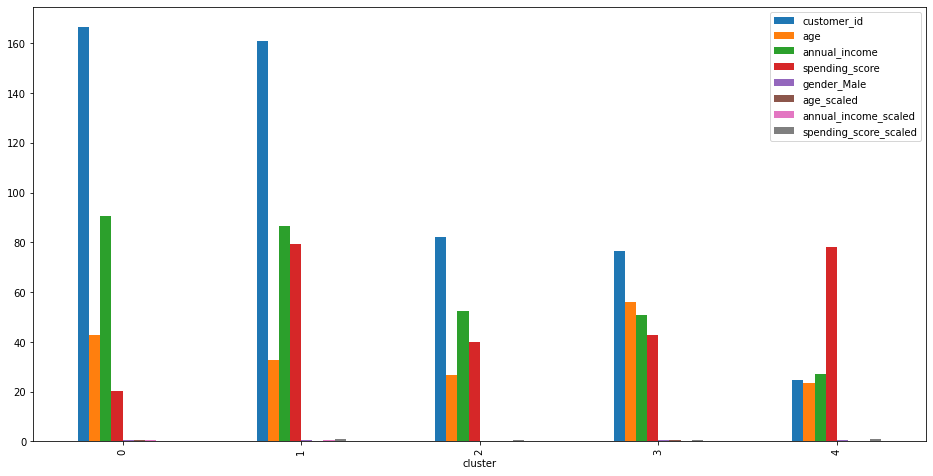

In [51]:
train.groupby('cluster').mean().plot.bar(figsize=(16,8))

## Try something a little more obvious
- Spending Score and annual income

In [52]:
X=train[['spending_score_scaled', 'annual_income_scaled']]

Best k value: 5


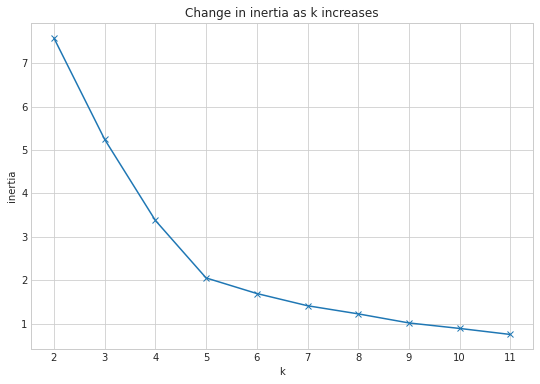

In [53]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    zz=pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)})
    zz.plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Calculates where slope stops dropping off - elbow method. Should yield best k value
inertias = pd.DataFrame(zz, columns = ['inertia'])

inertias["shifted"] = inertias.shift(1)

inertias["difference"] = inertias.inertia-inertias.shifted

inertias["pct_difference"]=inertias.difference/inertias.inertia

print(f"Best k value: {inertias.pct_difference.idxmin()}")

In [54]:
# k=5 is elbow
kmeans = KMeans(5, random_state=123)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=123)

In [55]:
train['cluster']=kmeans.predict(X)

In [56]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,162.347826,32.478261,87.304348,80.173913,0.434783,0.278428,0.592659,0.842276
1,88.239130,44.065217,56.108696,49.152174,0.369565,0.501254,0.336957,0.512257
2,23.333333,45.666667,26.333333,22.583333,0.333333,0.532051,0.092896,0.229610
3,23.142857,23.071429,26.214286,79.500000,0.428571,0.097527,0.091920,0.835106
4,160.529412,38.705882,86.823529,19.941176,0.352941,0.398190,0.588717,0.201502


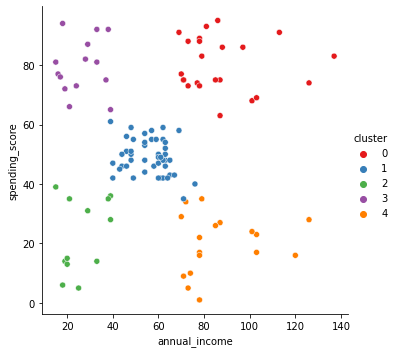

In [57]:
sns.relplot(data = train, x='annual_income', y = 'spending_score', hue='cluster', palette='Set1')

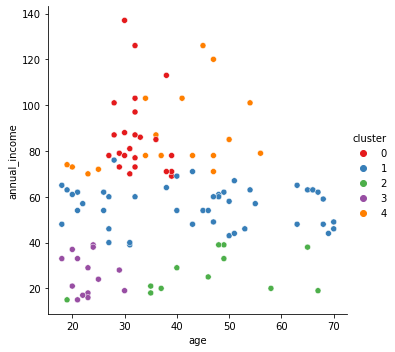

In [58]:
# Compare to age
sns.relplot(data = train, x='age', y = 'annual_income', hue='cluster', palette='Set1')

### Moving to bonus

In [61]:
url = "https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0"
url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

In [62]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


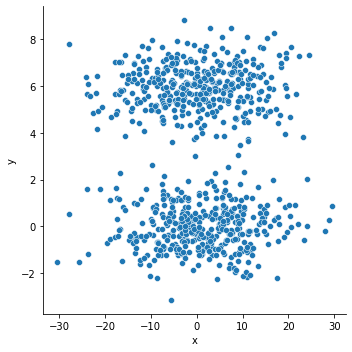

In [63]:
sns.relplot(data = df, x='x', y='y')

Best k value: 3


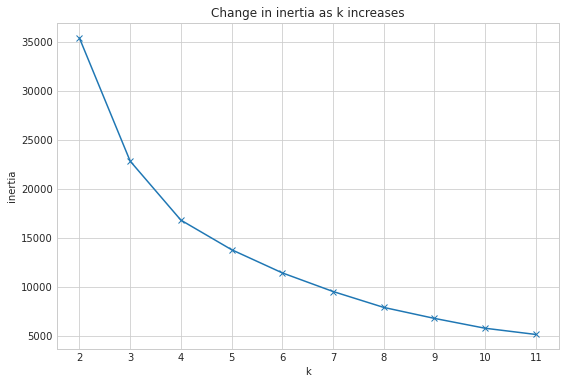

In [64]:
X=df
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    zz=pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)})
    zz.plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Calculates where slope stops dropping off - elbow method. Should yield best k value
inertias = pd.DataFrame(zz, columns = ['inertia'])

inertias["shifted"] = inertias.shift(1)

inertias["difference"] = inertias.inertia-inertias.shifted

inertias["pct_difference"]=inertias.difference/inertias.inertia

print(f"Best k value: {inertias.pct_difference.idxmin()}")

In [65]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=123)

In [66]:
df['cluster'] = kmeans.predict(X)

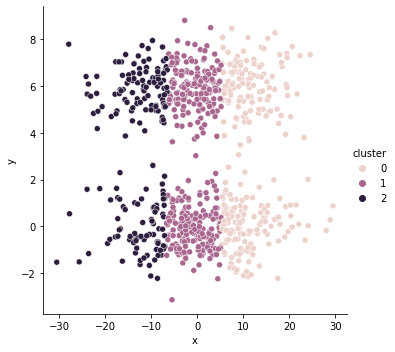

In [67]:
sns.relplot(data = df, x='x', y='y', hue='cluster')

### Scale?

In [68]:
scaler = MinMaxScaler()

In [70]:
df.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,2
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0


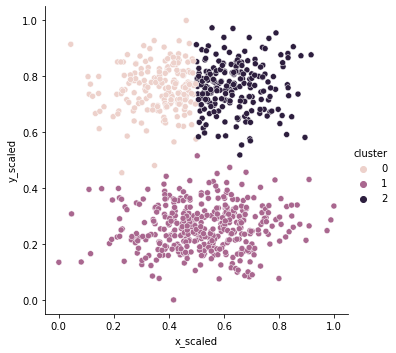

In [72]:
scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns = ["x_scaled","y_scaled","cluster"])

X = scaled_df[['x_scaled','y_scaled']]

kmean = KMeans(n_clusters=3, random_state=123)
kmean.fit(X)
scaled_df["cluster"] = kmean.predict(X)

sns.relplot(data = scaled_df, x='x_scaled', y='y_scaled', hue='cluster')

### I would still use 2 clusters.

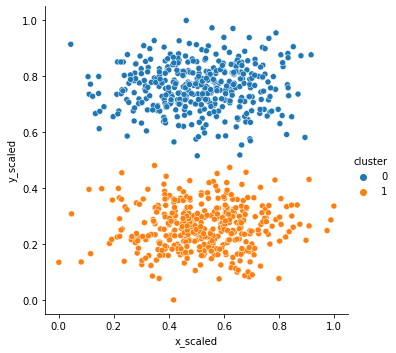

In [73]:
scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns = ["x_scaled","y_scaled","cluster"])

X = scaled_df[['x_scaled','y_scaled']]

kmean = KMeans(n_clusters=2, random_state=123)
kmean.fit(X)
scaled_df["cluster"] = kmean.predict(X)

sns.relplot(data = scaled_df, x='x_scaled', y='y_scaled', hue='cluster')